Create folds: why?, because it generally results in models with low bias. [Read more](https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79)

Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection

Read csv as dataframe

In [2]:
df_train = pd.read_csv("../input/30-days-of-ml/train.csv")
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [3]:
#Total amount of data
len(df_train.value_counts())

300000

<AxesSubplot:>

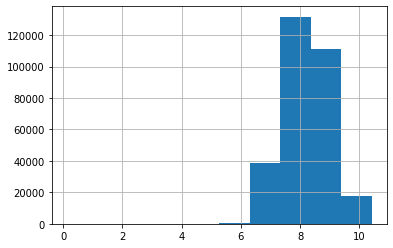

In [4]:
#plot target distribution
df_train.target.hist()

Append a new column called "kfold" with value "-1" to the end of the dataframe

In [5]:
df_train["kfold"] = -1
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
0,1,B,B,B,C,B,B,A,E,C,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,-1
1,2,B,B,A,A,B,D,A,F,A,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,-1
2,3,A,A,A,C,B,D,A,D,A,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,-1
3,4,B,B,A,C,B,D,A,E,C,...,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,-1
4,6,A,A,A,C,B,D,A,E,A,...,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,-1


Create 10 folds

In [6]:
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
for fold, (train_indicies, valid_indicies) in enumerate(kf.split(X=df_train)):
    df_train.loc[valid_indicies, "kfold"] = fold

In [7]:
#Amount of data in each fold
df_train.kfold.value_counts()

0    30000
1    30000
2    30000
3    30000
4    30000
5    30000
6    30000
7    30000
8    30000
9    30000
Name: kfold, dtype: int64

Plot target distribution for each fold, the distribution should be the same as the for all folds and the plot of the target distribution on the overal dataset made earlier 

In [8]:
def plot_fold_dist(fold):
    for fold in range(len(df_train.kfold.unique())):
        return df_train[df_train.kfold == fold].target.hist()
        

<AxesSubplot:>

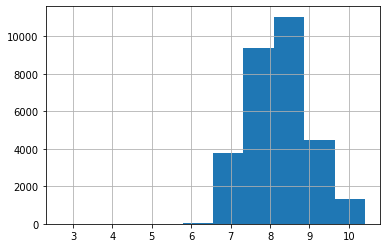

In [9]:
plot_fold_dist(9)

save train-folds

In [10]:
df_train.to_csv("train_folds.csv", index=False)